In [1]:
import pandas as pd
import string
import numpy as np
import itertools
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from scipy import stats
import matplotlib
import math

# Анализ временного ряда

In [13]:
%matplotlib inline

In [2]:
df_tseries = pd.read_csv("./NYPD_Motor_Vehicle_Collisions.csv")

In [95]:
df_tseries_2 = df_tseries.groupby('DATE', as_index=False).size()

In [96]:
df_tseries_2.index = pd.to_datetime(df_tseries_2.index)

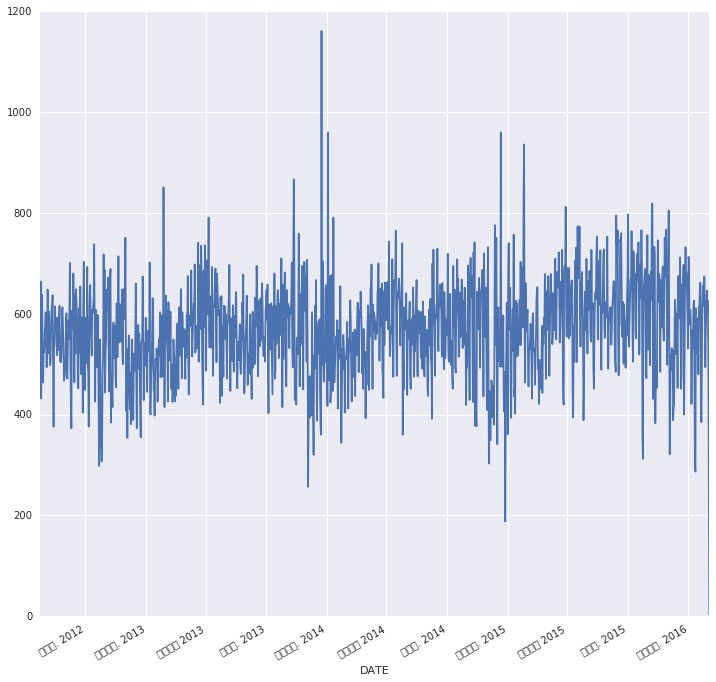

In [76]:
df_tseries_2.plot(figsize=(12,12))

Частная автокорреляционная функция демонстрирует корреляцию между двумя временными лагами за вычетом влияния всех внутренних значений автокорреляции. В частной автокорреляционной функции устраняется зависимость между наблюдениями внутри лага (промежуточными наблюдениями). Частная автокорреляция на данном лаге аналогична обычной автокорреляции, за исключением того, что при вычислении из неё исключается влияние автокорреляций с меньшими лагами.

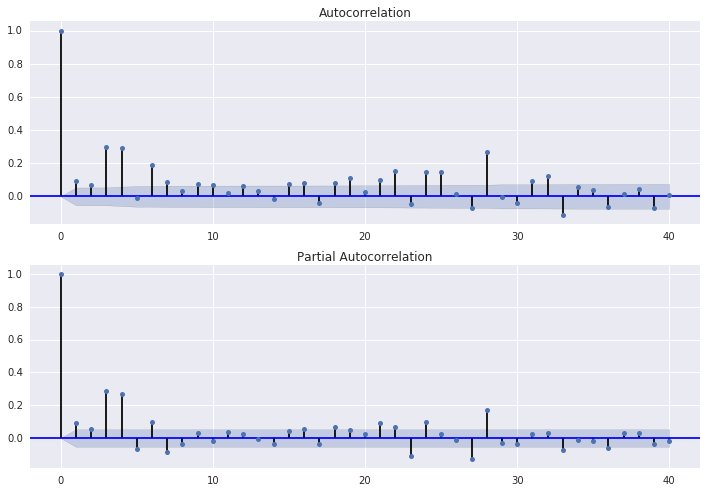

In [57]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_tseries_2, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_tseries_2, lags=40, ax=ax2)


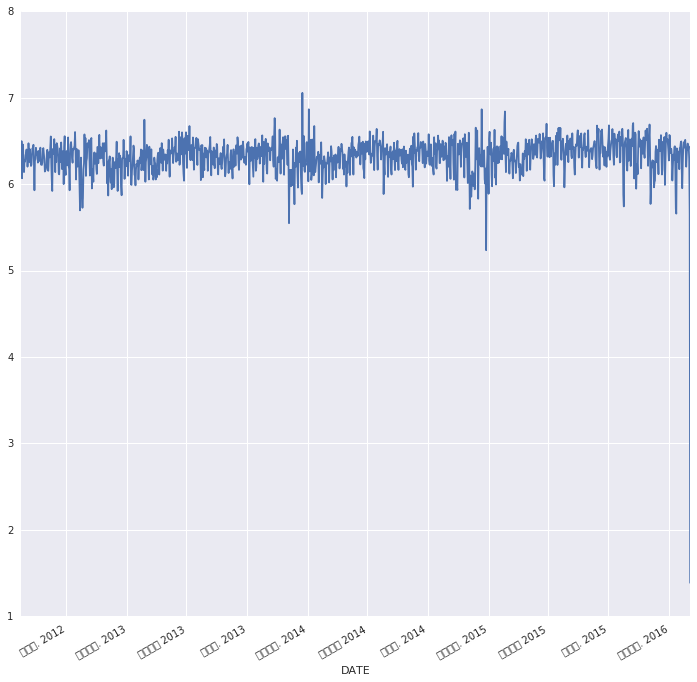

In [77]:
df_log = np.log(df_tseries_2)
df_log.plot(figsize=(12,12))

График прологарифмированных значений вместе с простым скользящим средним.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


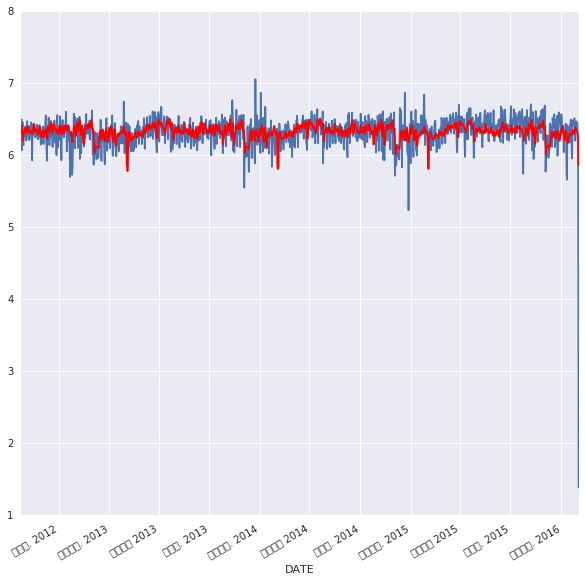

In [78]:
moving_avg = pd.rolling_mean(df_log,12)
#df_log.plot()
df_log.plot(figsize=(10,10))
#plt.plot(moving_avg, color='red')
moving_avg.plot(color='red')

И разница между ними.

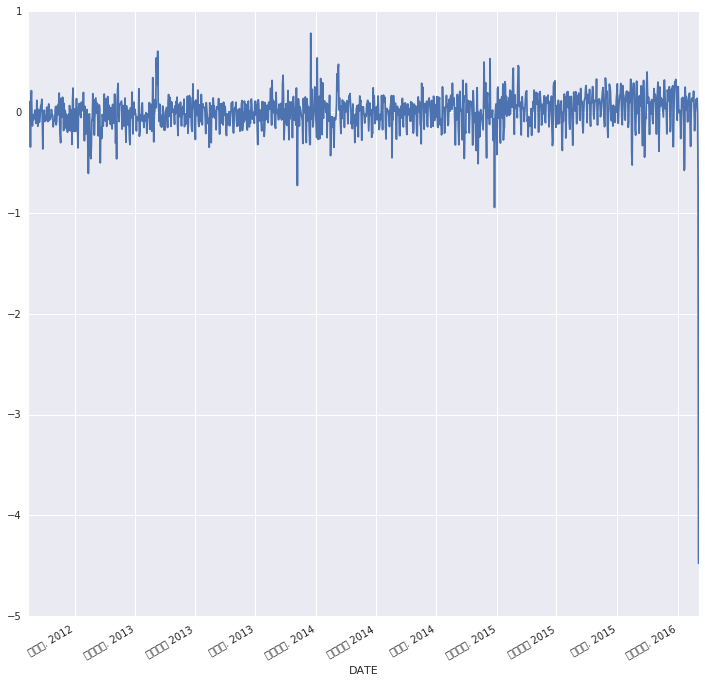

In [79]:
ts_log_moving_avg_diff = df_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.plot(figsize=(12,12))

Тест Дики-Фуллера для проверки гипотезы о единичном корне.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


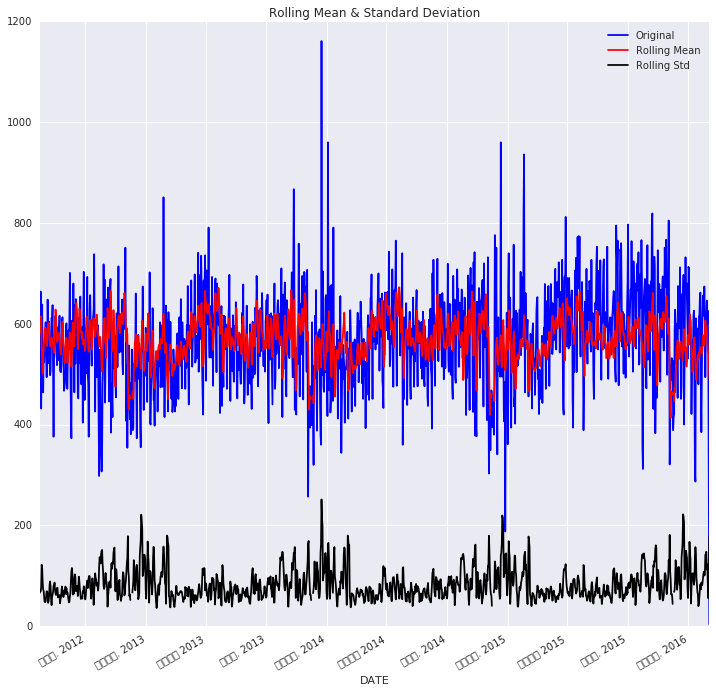

Results of Dickey-Fuller Test:
Test Statistic                   -4.415665
p-value                           0.000278
#Lags Used                       23.000000
Number of Observations Used    1329.000000
Critical Value (5%)              -2.863717
Critical Value (1%)              -3.435280
Critical Value (10%)             -2.567929
dtype: float64


In [81]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = timeseries.plot(figsize=(12,12),color='blue',label='Original')
    mean = rolmean.plot(color='red', label='Rolling Mean')
    std = rolstd.plot(color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
    
test_stationarity(df_tseries_2)

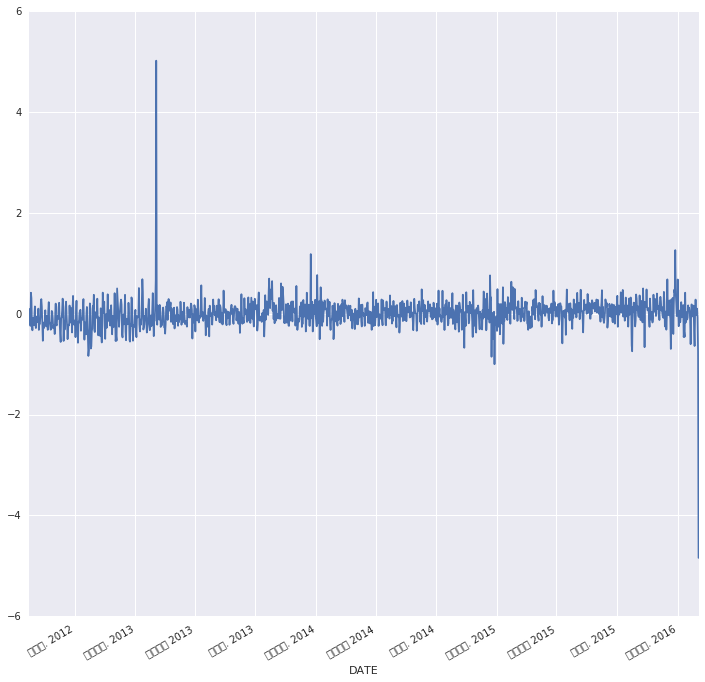

In [82]:
ts_log_diff = df_log - df_log.shift()
ts_log_diff.dropna(inplace=True)
ts_log_diff.plot(figsize=(12,12))

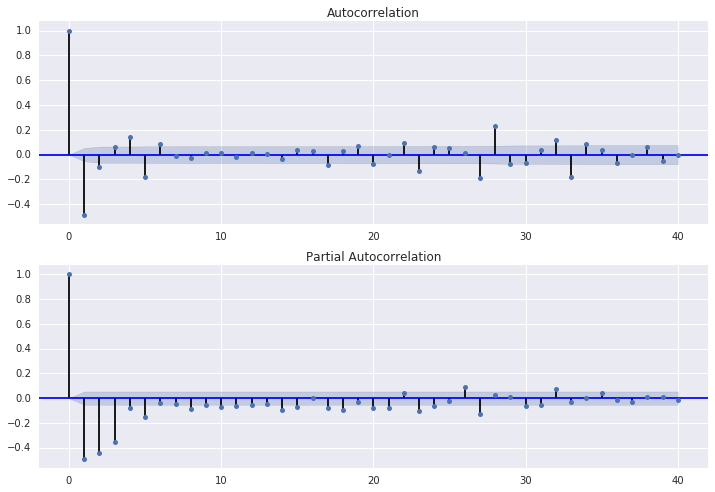

In [86]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=40, ax=ax2)